### Zomato Personal Order History: EDA

Importing PDF and extracting data from it:

In [1]:
import fitz
import os
import pdfplumber as pdf
import pandas as pd

In [2]:
os.getcwd()
#new_dir = "C:\\Users\\divek\\OneDrive\\Desktop\\Tanvi\\Portfolio Projects\\Personal Zomato Order History"
#os.chdir(new_dir)

'c:\\Users\\divek\\OneDrive\\Desktop\\Tanvi\\Portfolio Projects\\Personal Zomato Order History'

Create a blank list:

In [19]:
orders_data = []

Open the merged PDF document:

In [20]:
pdf_path = "C:\\Users\\divek\\OneDrive\\Desktop\\Tanvi\\Portfolio Projects\\Personal Zomato Order History\\Final Merged PDF.pdf"

Main extraction code:

In [21]:
import re
import pandas as pd

#orders_data = []

with pdf.open(pdf_path) as orders_pdf:
    for page in orders_pdf.pages:
        text = page.extract_text()

        # Extract details
        order_id = text.split("Order ID:")[1].split("\n")[0].strip() if "Order ID:" in text else None
        order_time = text.split("Order Time:")[1].split("\n")[0].strip() if "Order Time:" in text else None
        customer_name = text.split("Customer Name:")[1].split("\n")[0].strip() if "Customer Name:" in text else None
        delivery_address = text.split("Delivery Address:")[1].split("\nRestaurant Name:")[0].strip() if "Delivery Address:" in text else None
        rest_name = text.split("Restaurant Name:")[1].split("\nRestaurant Address:")[0].strip() if "Restaurant Name:" in text else None

        # Parse items and prices individually
        if "Order Time:" in text:
            order_dt = text.split("Order Time:")[1].split("\n")[0].strip()
            date_part, time_part = order_dt.split(", ")  # Split into date and time
            order_date = date_part.strip()  # Example: "01 July 2024"
            order_time = time_part.replace(".", ":").strip()  # Replace "." with ":" in time, e.g., "09:22 PM"
        else:
            order_date, order_time = None, None


        if "Item" in text and "Quantity" in text and "Unit Price" in text and "Total Price" in text:
            items_start = text.index("Item")  # Start at "Item" header
            items_section = text[items_start:]  # Take everything from "Item" onwards
            
            # Define end of the items section (e.g., by "Taxes")
            items_section = items_section.split("\nTaxes")[0] if "Taxes" in items_section else items_section
            
            # Split into lines and clean
            lines = [line.strip() for line in items_section.split("\n") if line.strip()]

            # Skip the header row
            header_row = lines.pop(0) if "Item" in lines[0] else None

            # Parse each line
            for line in lines:
                match = re.search(r"(.+?)\s+(\d+)\s+₹([\d.]+)\s+₹([\d.]+)", line)
                if match:
                    item_name = match.group(1).strip()
                    quantity = int(match.group(2))
                    unit_price = float(match.group(3))
                    total_price = float(match.group(4))

                    # Append parsed item details to the list
                    orders_data.append({
                        "Order ID": order_id,
                        "Customer Name": customer_name,
                        "Delivery Address": delivery_address,
                        "Restaurant": rest_name,
                        "Item Name": item_name,
                        "Qty": quantity,
                        "Unit Pr": unit_price,
                        "Total Pr": total_price,
                        "Order Date": order_date,
                        "Order Time": order_time
                    })
        else:
            # Handle missing items
            orders_data.append({
                "Order ID": order_id,
                "Customer Name": customer_name,
                "Delivery Address": delivery_address,
                "Restaurant": rest_name,
                "Item Name": None,
                "Qty": None,
                "Unit Pr": None,
                "Total Pr": None,
                "Order Date": None,
                "Order Time": None
            })

# Create DataFrame
orders_df = pd.DataFrame(orders_data)
orders_df.head(10)


,Order ID,Customer Name,Delivery Address,Restaurant,Item Name,Qty,Unit Pr,Total Pr,Order Date,Order Time
0,4581150695,Tanvi Divekar,"Flat 501, Shree Guru Kripa CHS, R.H.B Road Mul...",Woodland Retreat,Spring Roll,1.0,280.00,280.00,03 January 2023,08:40 PM
1,4581150695,Tanvi Divekar,"Flat 501, Shree Guru Kripa CHS, R.H.B Road Mul...",Woodland Retreat,Lasooni Palak Paneer,1.0,260.00,260.00,03 January 2023,08:40 PM
2,5615310493,Tanvi Divekar,"501, Shree Gurukripa Building, In the lane opp...",The Dough Therapy,Verdure Pizza,1.0,689.00,689.00,02 March 2024,09:33 PM
3,5616147915,Tanvi Divekar,"501, Shree Gurukripa Building, In the lane opp...",McDonald's,Chicken Maharaja Mac Burger,1.0,258.10,258.10,29 February 2024,08:05 PM
4,5618389985,Tanvi Divekar,"501, Shree Gurukripa Building, In the lane opp...",Starbucks Coffee,Picco Signature Hot Chocolate,1.0,245.00,245.00,03 March 2024,09:36 PM
5,5621934782,Tanvi Divekar,"502, Shree Gurukripa Building, In the lane opp...",Hariom Sweets,Dahi Vada,1.0,112.00,112.00,02 March 2024,09:11 PM
6,5626760931,Tanvi Divekar,"501, Shree Gurukripa Building, In the lane opp...",Natural Ice Cream,Chocobite Ice Cream,1.0,130.50,130.50,05 March 2024,09:23 PM
7,5631196802,Tanvi Divekar,"501, Shree Gurukripa Building, In the lane opp...",KFC,Chicken Popcorn - Large,1.0,248.57,248.57,07 March 2024,07:59 PM
8,5631196802,Tanvi Divekar,"501, Shree Gurukripa Building, In the lane opp...",KFC,Chicken Popcorn - Medium,1.0,168.57,168.57,07 March 2024,07:59 PM
9,5633971981,Tanvi Divekar,"501, Shree Gurukripa Building, In the lane opp...",Sesami Asian Kitchen Bar,Phad Thai Veg,1.0,410.00,410.00,08 March 2024,08:09 PM


In [22]:
orders_df.dtypes

Order ID             object
Customer Name        object
Delivery Address     object
Restaurant           object
Item Name            object
Qty                 float64
Unit Pr             float64
Total Pr            float64
Order Date           object
Order Time           object
dtype: object

##### Categorizing Items into Buckets:

In [25]:
## Printing the unique list of ordered items:
orders_df2 = orders_df.copy()
orders_df2.head(5)

,Order ID,Customer Name,Delivery Address,Restaurant,Item Name,Qty,Unit Pr,Total Pr,Order Date,Order Time
0,4581150695,Tanvi Divekar,"Flat 501, Shree Guru Kripa CHS, R.H.B Road Mul...",Woodland Retreat,Spring Roll,1.0,280.0,280.0,03 January 2023,08:40 PM
1,4581150695,Tanvi Divekar,"Flat 501, Shree Guru Kripa CHS, R.H.B Road Mul...",Woodland Retreat,Lasooni Palak Paneer,1.0,260.0,260.0,03 January 2023,08:40 PM
2,5615310493,Tanvi Divekar,"501, Shree Gurukripa Building, In the lane opp...",The Dough Therapy,Verdure Pizza,1.0,689.0,689.0,02 March 2024,09:33 PM
3,5616147915,Tanvi Divekar,"501, Shree Gurukripa Building, In the lane opp...",McDonald's,Chicken Maharaja Mac Burger,1.0,258.1,258.1,29 February 2024,08:05 PM
4,5618389985,Tanvi Divekar,"501, Shree Gurukripa Building, In the lane opp...",Starbucks Coffee,Picco Signature Hot Chocolate,1.0,245.0,245.0,03 March 2024,09:36 PM


In [26]:
orders_df2['Item Name'] = orders_df2['Item Name'].str.strip().str.lower()
unique_items = orders_df2['Item Name'].unique()
unique_items_list = unique_items.tolist()
print(unique_items_list)

['spring roll', 'lasooni palak paneer', 'verdure pizza', 'chicken maharaja mac burger', 'picco signature hot chocolate', 'dahi vada', 'chocobite ice cream', 'chicken popcorn - large', 'chicken popcorn - medium', 'phad thai veg', 'choco lava cake', 'farmhouse pizza', 'peppy paneer pizza', 'garlic breadsticks', 'black currant (medium fat) ice cream', 'pesto avocado panini sandwich', 'urban caesar salad (veg)', 'lebanese platter', 'single dahi vada', 'anjeer ice cream', 'zaikedaar paneer biryani (paneer dum biryani - serves', 'mango (medium fat) ice cream', '2 vada', 'veg lasagn', 'vada pav', 'dahi vada [2 pieces]', 'mumbai cheese grilled sandwich', 'veg toast sandwich', 'veg personal wok bowl', 'mcchicken burger', '6 pc chicken nuggets', 'fries (medium)', 'fries (m) + piri piri mix', None, 'wok tossed hakka noodles prawns(mc)', 'classico pizza', 'watermelon ice cream', 'stir fried black pepper udon noodles', 'achari chaap', 'veg overload pizza', 'afghani chaap', 'malai chaap', 'caffe moc

##### Defining categories for each unique ordered item:

In [27]:
categories = {
    'Chinese Starters': ['spring roll', 'jiangs chilli cottage cheese (ak)'],
    'Palak Paneer': ['lasooni palak paneer'],
    'Pesto based dish': ['verdure pizza', 'pesto avocado panini sandwich'],
    'McD Burger/Fries': ['chicken maharaja mac burger', 'mcchicken burger', '6 pc chicken nuggets', 
                          'fries (medium)', 'fries (m) + piri piri mix', 'new mcsaver pizza mcpuff'],
    'Hot Chocolate': ['picco signature hot chocolate'],
    'Chaat': ['dahi vada', 'single dahi vada', '2 vada', 'vada pav', 'dahi vada [2 pieces]', 
              'vada [2 vada]', 'mumbai cheese grilled sandwich'],
    'Icecream': ['chocobite ice cream', 'black currant (medium fat) ice cream', 'watermelon ice cream', 
                 'anjeer ice cream', 'mango (medium fat) ice cream', 'peach apricot ice cream', 
                 'coffee walnut ice cream', 'vanilla premium ice cream [1 tub, 500 ml]'],
    'Chicken Popcorn': ['chicken popcorn - large', 'chicken popcorn - medium'],
    'Noodles': ['phad thai veg', 'veg personal wok bowl', 'wok tossed hakka noodles prawns(mc)', 
                'stir fried black pepper udon noodles', 'wok tossed noodles prawn (ak)', 'prawn hakka noodles'],
    'Dessert': ['choco lava cake', 'banana caramel waffle sandwich', 'triple chocolate waffle sandwich', 
                'besan ladoo [250 grams]', 'mango burfi', 'dutch truffle pastry', 'tiramisu', 
                'eclair chocolate [1 piece]', 'eggless walnut brownie', 'crunchy mexican sandwich', 
                'eggless fresh cream pineapple pastry [1 piece]', 'walnut brownie [1 piece]', 
                'chocolate truffle pastry', 'chocolate nougat pastry', 'kela bhaji', 'chocolate mousse'],
    'Other Pizza': ['farmhouse pizza', 'peppy paneer pizza', 'classico pizza', 'veg overload pizza', 
                    'afghani chaap', 'malai chaap', 'exotic veg pizza', 'margherita pizza', 
                    'cheese tease', 'peri peri paneer','classic burrata pizza'],
    'Dominos Starters': ['garlic breadsticks', 'garlic bread with cheese'],
    'Lebanese': ['lebanese platter'],
    'Salad': ['urban caesar salad (veg)', 'vegan salad'],
    'Biryani': ['zaikedaar paneer biryani (paneer dum biryani - serves', 'murgh tikka biryani (chicken tikka dum biryani -', 
                'subz-e-biryani (dum veg biryani - serves 1)'],
    'Wrap/Sandwich': ['mumbai cheese grilled sandwich', 'veg toast sandwich', 'hummus and chipotle paneer wrap', 
                      'crunchy mexican sandwich'],
    'Fancy Starbucks brew': ['cold brew with ginger ale', 'vietnamese iced coffee'],
    'Kulcha': ['cheese garlic naan', 'amristari special kulcha with cheese', 'gobi kulcha', 'matar paneer kulcha', 
               'paneer onion kulcha', 'mixed veg kulcha', 'aloo onion kulcha'],
    'Mocha': ['caffe mocha'],
    'Soya Chaap': ['achari chaap', 'tandoori chaap', 'afghani chaap', 'malai chaap'],
    'Indian Starters': ['chicken tikka + chicken reshmi kebab', 'paneer tikka', 'mushroom achari tikka', 'hara bhara kebab'],
    'Roti': ['roti', 'rumali roti'],
    'Sushi': ['asparagus tempura rolls (ak)', 'veg california roll (ak)'],
    'Punjabi': ['amristari special kulcha'],
    'Other Pasta': ['veg lasagn', 'arrabbiata pasta', 'alfredo pasta'],
    'Onion Rings': ['onion rings']
}


In [28]:
orders_df2 = orders_df2.dropna(subset=['Item Name'])
# Function to assign categories
def categorize_item(item_name):
    for category, keywords in categories.items():
        if any(keyword.lower() in item_name.lower() for keyword in keywords):
            return category
    return 'Other'  # Default category if no keywords match

# Apply function to create the 'Item Category' column
orders_df2['Item Category'] = orders_df2['Item Name'].apply(categorize_item)

# Display the result
orders_df2.head(5)

,Order ID,Customer Name,Delivery Address,Restaurant,Item Name,Qty,Unit Pr,Total Pr,Order Date,Order Time,Item Category
0,4581150695,Tanvi Divekar,"Flat 501, Shree Guru Kripa CHS, R.H.B Road Mul...",Woodland Retreat,spring roll,1.0,280.0,280.0,03 January 2023,08:40 PM,Chinese Starters
1,4581150695,Tanvi Divekar,"Flat 501, Shree Guru Kripa CHS, R.H.B Road Mul...",Woodland Retreat,lasooni palak paneer,1.0,260.0,260.0,03 January 2023,08:40 PM,Palak Paneer
2,5615310493,Tanvi Divekar,"501, Shree Gurukripa Building, In the lane opp...",The Dough Therapy,verdure pizza,1.0,689.0,689.0,02 March 2024,09:33 PM,Pesto based dish
3,5616147915,Tanvi Divekar,"501, Shree Gurukripa Building, In the lane opp...",McDonald's,chicken maharaja mac burger,1.0,258.1,258.1,29 February 2024,08:05 PM,McD Burger/Fries
4,5618389985,Tanvi Divekar,"501, Shree Gurukripa Building, In the lane opp...",Starbucks Coffee,picco signature hot chocolate,1.0,245.0,245.0,03 March 2024,09:36 PM,Hot Chocolate


#### Visualizing the Data:

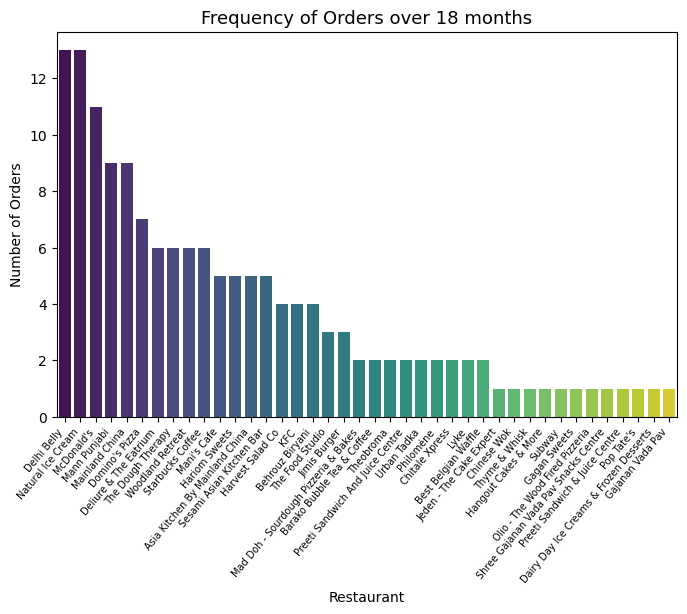

In [23]:
import seaborn as sbn
import matplotlib.pyplot as plt

## Counting occurences of each restaurant:
rest_count = orders_df['Restaurant'].value_counts().reset_index()
rest_count.columns = ['Restaurant', 'Count']

## Plot the histogram:
plt.figure(figsize = (8,5))
sbn.barplot(data=rest_count, x='Restaurant', y='Count', palette='viridis')
plt.title('Frequency of Orders over 18 months', fontsize=13, fontfamily='sans-serif')
plt.xlabel('Restaurant', fontsize=10, fontfamily='sans-serif')
plt.ylabel('Number of Orders', fontsize=10, fontfamily='sans-serif')

## Rotate x-axis labels for better visibility
plt.xticks(rotation=50, ha='right',fontsize = 7, fontfamily='sans-serif')
plt.show()


##### What have I ordered the most?

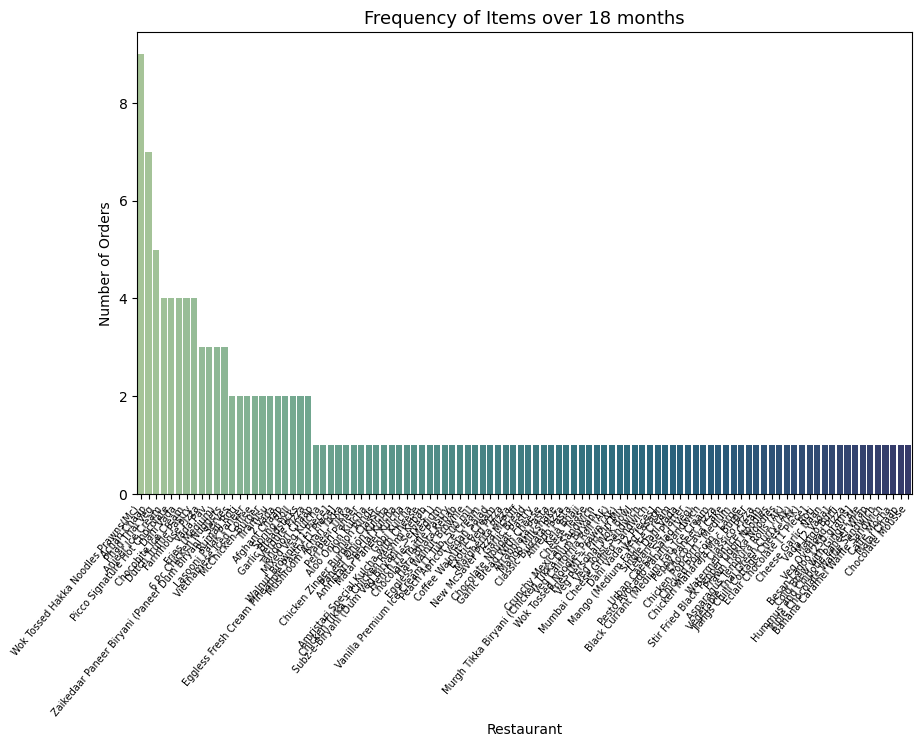

In [24]:
## Plotting a similar histogram for items ordered:
## Counting occurences of each restaurant:
item_count = orders_df['Item Name'].value_counts().reset_index()
item_count.columns = ['Item Name', 'Count']

## Plot the histogram:
plt.figure(figsize = (10,6))
sbn.barplot(data=item_count, x='Item Name', y='Count', palette='crest')
plt.title('Frequency of Items over 18 months', fontsize=13, fontfamily='sans-serif')
plt.xlabel('Restaurant', fontsize=10, fontfamily='sans-serif')
plt.ylabel('Number of Orders', fontsize=10, fontfamily='sans-serif')

## Rotate x-axis labels for better visibility
plt.xticks(rotation=50, ha='right',fontsize = 7, fontfamily='sans-serif')
plt.show()

##### Frequency of items ordered:


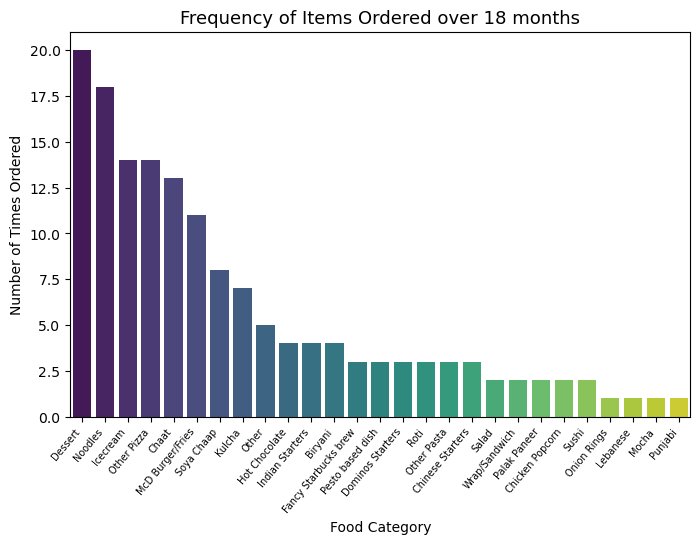

In [29]:
## Plotting a similar histogram for items ordered:
## Counting occurences of each restaurant:
item_cat_count = orders_df2['Item Category'].value_counts().reset_index()
item_cat_count.columns = ['Item Category', 'Count']

## Plot the histogram:
plt.figure(figsize = (8,5))
sbn.barplot(data=item_cat_count, x='Item Category', y='Count', palette='viridis')
plt.title('Frequency of Items Ordered over 18 months', fontsize=13, fontfamily='sans-serif')
plt.xlabel('Food Category', fontsize=10, fontfamily='sans-serif')
plt.ylabel('Number of Times Ordered', fontsize=10, fontfamily='sans-serif')

## Rotate x-axis labels for better visibility
plt.xticks(rotation=50, ha='right',fontsize = 7, fontfamily='sans-serif')
plt.show()

##### At what times have I ordered these?

In [30]:
orders_df2['Order Time']=pd.to_datetime(orders_df2['Order Time'], format = "%I:%M %p")
orders_df2['Order Hour']=orders_df2['Order Time'].dt.hour

In [31]:
def order_time(hour):
    if 6 <= hour < 11:
        return 'Breakfast'
    elif 11<= hour < 15:
        return 'Lunch'
    elif 15 <= hour < 19:
        return 'Snacks'
    elif 19 <= hour < 21:
        return 'Dinner'
    else:
        return 'Post 9 PM'
    
orders_df2['Time of the Day'] = orders_df2['Order Hour'].apply(order_time)
time_counts = orders_df2['Time of the Day'].value_counts().reindex(['Breakfast', 'Lunch', 'Snacks', 'Dinner', 'Post 9 PM'])

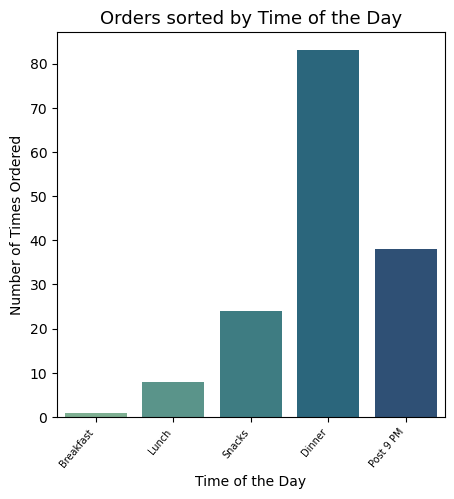

In [32]:
## Plotting:
plt.figure(figsize=(5,5))
sbn.barplot(x=time_counts.index, y=time_counts.values, palette = 'crest')
plt.title('Orders sorted by Time of the Day', fontsize=13, fontfamily='sans-serif')
plt.xlabel('Time of the Day', fontsize=10, fontfamily='sans-serif')
plt.ylabel('Number of Times Ordered', fontsize=10, fontfamily='sans-serif')

## Rotate x-axis labels for better visibility
plt.xticks(rotation=50, ha='right',fontsize = 7, fontfamily='sans-serif')
plt.show()

##### What foods have I ordered specifically after 9 PM?

In [52]:
#Categorizing order times into buckets:
post9_item_count = orders_df2[orders_df2['Time of the Day'] == 'Post 9 PM'].copy()
#post9_item_count.head(5)

cat_totals = post9_item_count.groupby('Item Category')['Item Category'].transform('count')
post9_item_count['Total Count of Each Category']=cat_totals

post9_item_count.head(2)

,Order ID,Customer Name,Delivery Address,Restaurant,Item Name,Qty,Unit Pr,Total Pr,Order Date,Order Time,Item Category,Order Hour,Time of the Day,Total Count of Each Category
2,5615310493,Tanvi Divekar,"501, Shree Gurukripa Building, In the lane opp...",The Dough Therapy,verdure pizza,1.0,689.0,689.0,02 March 2024,1900-01-01 21:33:00,Pesto based dish,21,Post 9 PM,1
4,5618389985,Tanvi Divekar,"501, Shree Gurukripa Building, In the lane opp...",Starbucks Coffee,picco signature hot chocolate,1.0,245.0,245.0,03 March 2024,1900-01-01 21:36:00,Hot Chocolate,21,Post 9 PM,3


In [54]:
post9_item_count = post9_item_count.sort_values(by='Total Count of Each Category', ascending = True)

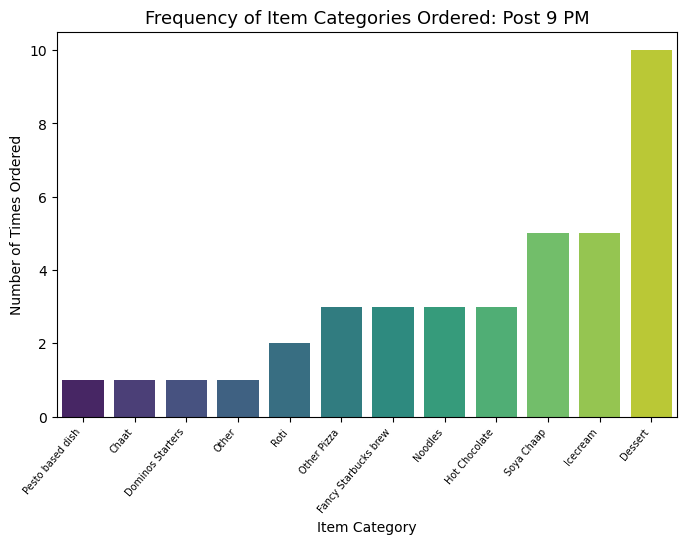

In [55]:
## Plot the histogram:
plt.figure(figsize = (8,5))
sbn.barplot(data=post9_item_count, x='Item Category', y='Total Count of Each Category', palette='viridis')
plt.title('Frequency of Item Categories Ordered: Post 9 PM', fontsize=13, fontfamily='sans-serif')
plt.xlabel('Item Category', fontsize=10, fontfamily='sans-serif')
plt.ylabel('Number of Times Ordered', fontsize=10, fontfamily='sans-serif')

## Rotate x-axis labels for better visibility
plt.xticks(rotation=50, ha='right',fontsize = 7, fontfamily='sans-serif')
plt.show()